In [1]:
import numpy as np

## Aufgabe 1: Fourier-Approximation in numpy

### (a) Implementierung der k-ten Fourier-Komponente
Implementieren Sie mit numpy eine Methode zur Berechnung der k-ten Fourier-Komponente einer Funktion, gegeben durch arrays `x` und `y`, mithilfe der Trapezregel (`np.trapz`).

In [2]:
from FA import Fourier_Approximation_numpy as FA_numpy

In [3]:
x_values = np.linspace(0, 2 , 100)
y_values = np.sin(x_values)
k_index = 1

In [4]:
component = FA_numpy.compute_fourier_component(x_values, y_values, k_index)
print(component)

(0.06578743787334976-0.18926306101664186j)


### (b) Fourier-Approximation
Implementieren Sie mit numpy eine Methode zur Berechnung der Fourier-Approximation `fapp` mit einer gegebenen Anzahl (2m + 1) von Fourier-Komponenten.

In [5]:
a = 3
N = 600
m = 5
fapp = FA_numpy.fourier_approximation(FA_numpy.f1, a, N, m)
print(fapp)

[0.05501415 0.05502602 0.05506163 0.05512095 0.05520394 0.05531052
 0.05544062 0.05559413 0.05577095 0.05597092 0.05619391 0.05643973
 0.05670821 0.05699913 0.05731229 0.05764744 0.05800434 0.05838273
 0.05878233 0.05920286 0.059644   0.06010544 0.06058687 0.06108794
 0.06160831 0.06214763 0.06270553 0.06328164 0.06387559 0.064487
 0.06511546 0.0657606  0.06642202 0.06709931 0.06779208 0.06849992
 0.06922243 0.0699592  0.07070985 0.07147396 0.07225114 0.07304099
 0.07384314 0.07465719 0.07548277 0.07631951 0.07716703 0.078025
 0.07889305 0.07977086 0.08065809 0.08155442 0.08245955 0.08337318
 0.08429503 0.08522483 0.08616232 0.08710725 0.0880594  0.08901854
 0.08998448 0.09095702 0.09193599 0.09292124 0.09391262 0.09491
 0.09591328 0.09692235 0.09793713 0.09895756 0.09998359 0.10101518
 0.10205232 0.10309499 0.10414322 0.10519702 0.10625643 0.10732152
 0.10839234 0.10946898 0.11055153 0.11164011 0.11273482 0.11383581
 0.11494322 0.11605719 0.11717791 0.11830553 0.11944025 0.12058225
 0

### (c) Näherung der Funktion f1(x)
Nähern Sie die Funktion \( f_1(x) = \frac{1}{e^x + e^{-x}} \) auf dem Intervall \([-3, 3]\) (Auflösung: N = 600 Schritte) mit verschiedenen Anzahlen von Komponenten (2m + 1). Plotten Sie den Vergleich zur Originalfunktion `f`.

In [6]:
x_values = np.linspace(-3, 3, 600)
y_values_f1 = FA_numpy.f1(x_values)
m_values = [1, 3, 5, 10]

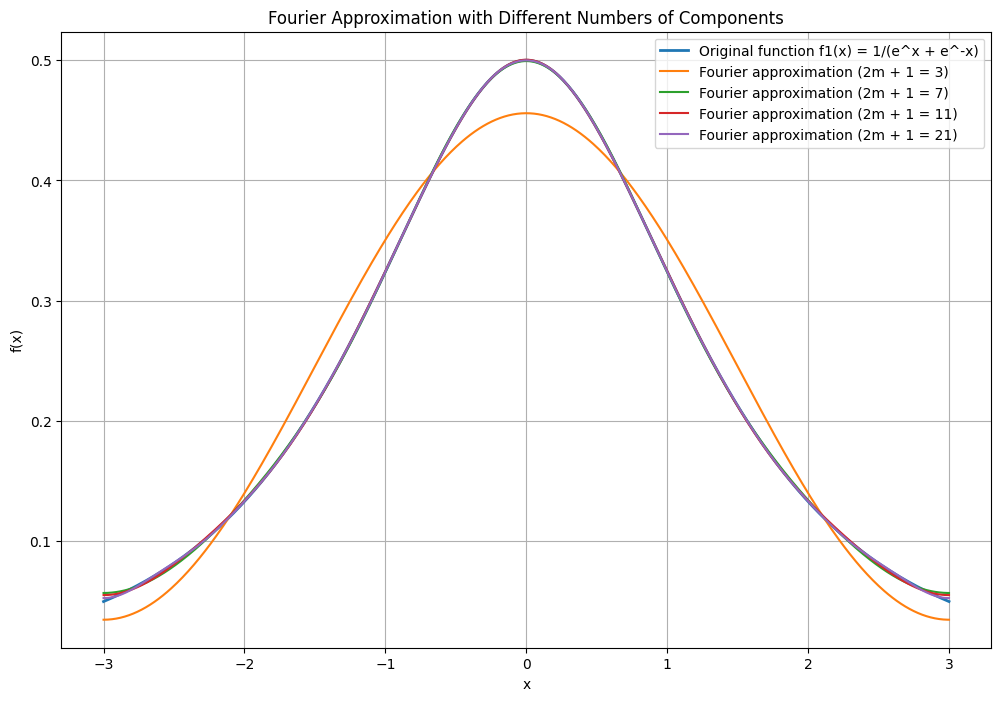

In [7]:
FA_numpy.plot_fourier_approximations(x_values, y_values_f1, m_values, function_name='f1(x) = 1/(e^x + e^-x)')

### (d) Bestimmung der Anzahl der Fourier-Komponenten
Bestimmen Sie die Anzahl der Fourier-Komponenten, die benötigt werden, um eine Approximation mit höchstens 0,1% relativen Fehler zu erhalten.

m=0:	Error = 393.7529%
m=1:	Error = 35.6209%
m=2:	Error = 35.6216%
m=3:	Error = 14.3350%
m=4:	Error = 13.6767%
m=5:	Error = 10.7728%
m=6:	Error = 9.2404%
m=7:	Error = 8.0057%
m=8:	Error = 7.0766%
m=9:	Error = 6.3363%
m=10:	Error = 5.7362%
m=11:	Error = 5.2392%
m=12:	Error = 4.8210%
m=13:	Error = 4.4644%
m=14:	Error = 4.1565%
m=15:	Error = 3.8881%
m=16:	Error = 3.6521%
m=17:	Error = 3.4428%
m=18:	Error = 3.2561%
m=19:	Error = 3.0883%
m=20:	Error = 2.9369%
m=21:	Error = 2.7994%
m=22:	Error = 2.6741%
m=23:	Error = 2.5594%
m=24:	Error = 2.4539%
m=25:	Error = 2.3567%
m=26:	Error = 2.2668%
m=27:	Error = 2.1834%
m=28:	Error = 2.1057%
m=29:	Error = 2.0333%
m=30:	Error = 1.9656%
m=31:	Error = 1.9022%
m=32:	Error = 1.8426%
m=33:	Error = 1.7865%
m=34:	Error = 1.7337%
m=35:	Error = 1.6838%
m=36:	Error = 1.6366%
m=37:	Error = 1.5918%
m=38:	Error = 1.5494%
m=39:	Error = 1.5091%
m=40:	Error = 1.4708%
m=41:	Error = 1.4342%
m=42:	Error = 1.3994%
m=43:	Error = 1.3661%
m=44:	Error = 1.3343%
m=45:	Error =

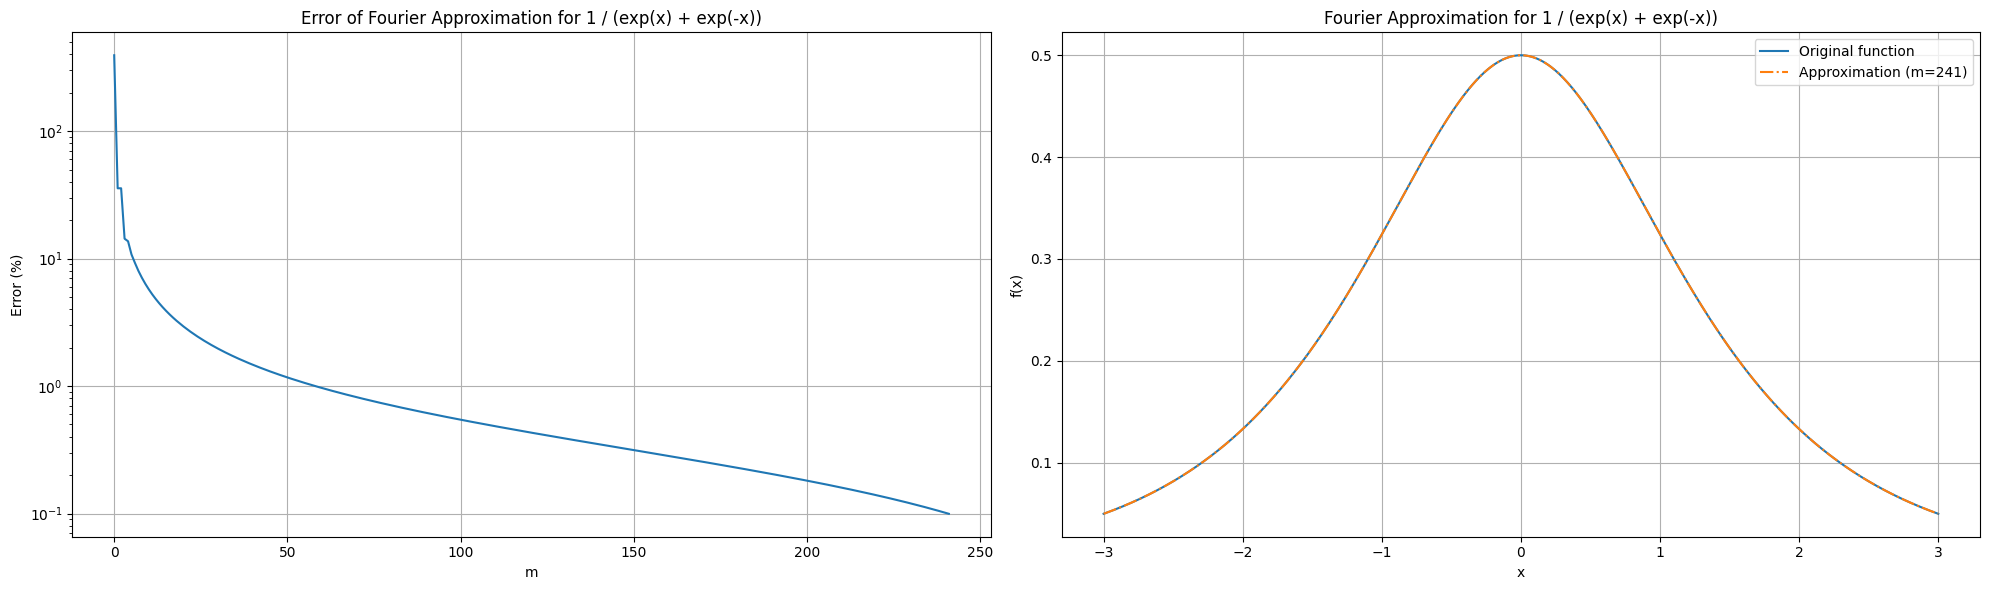



Number of Fourier components for a maximum relative error of 0.1%:

m=241




In [8]:
tolerance = 0.1
FA_numpy.find_optimal_fourier_components(FA_numpy.f1, x_values, desired_error=tolerance, label='1 / (exp(x) + exp(-x))')

### (e) Näherung weiterer Funktionen
Versuchen Sie die Funktionen \( f_2(x) = e^x \) und \( f_3(x) = e^{|x|} \) auf dem Intervall \([-3, 3]\) (Auflösung: N = 600 Schritte) mit einem 0,1%igen Approximationsfehler anzunähern. Beschreiben und erklären Sie die Unterschiede.

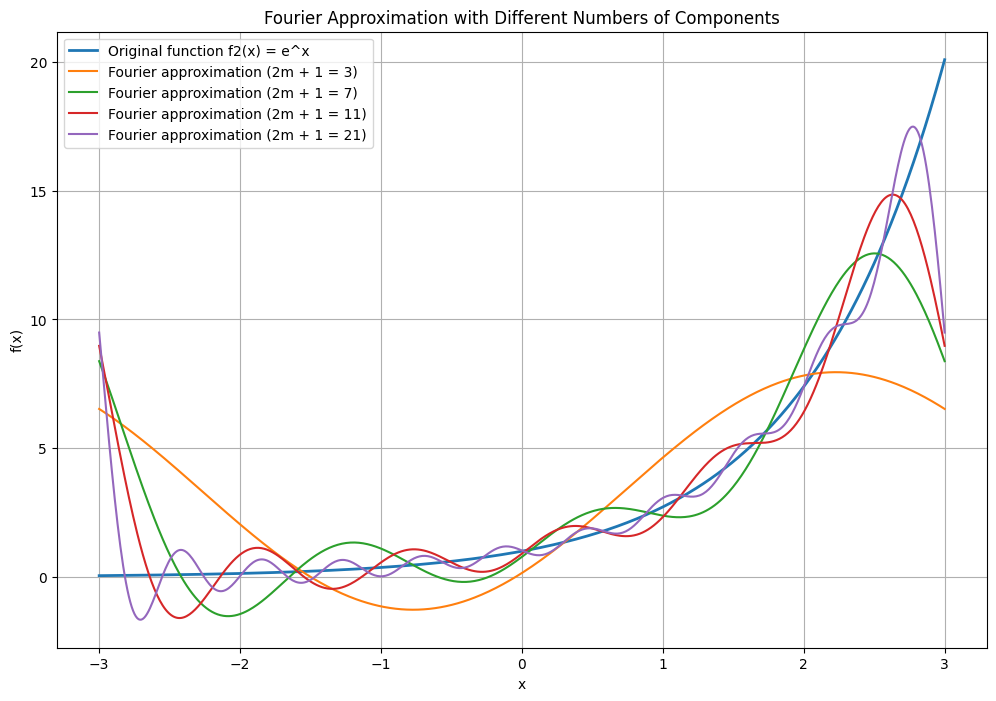

In [9]:
y_values_f2 = FA_numpy.f2(x_values)
FA_numpy.plot_fourier_approximations(x_values, y_values_f2, m_values, function_name='f2(x) = e^x')

m=0:	Error = 6607.2026%
m=1:	Error = 13005.3630%


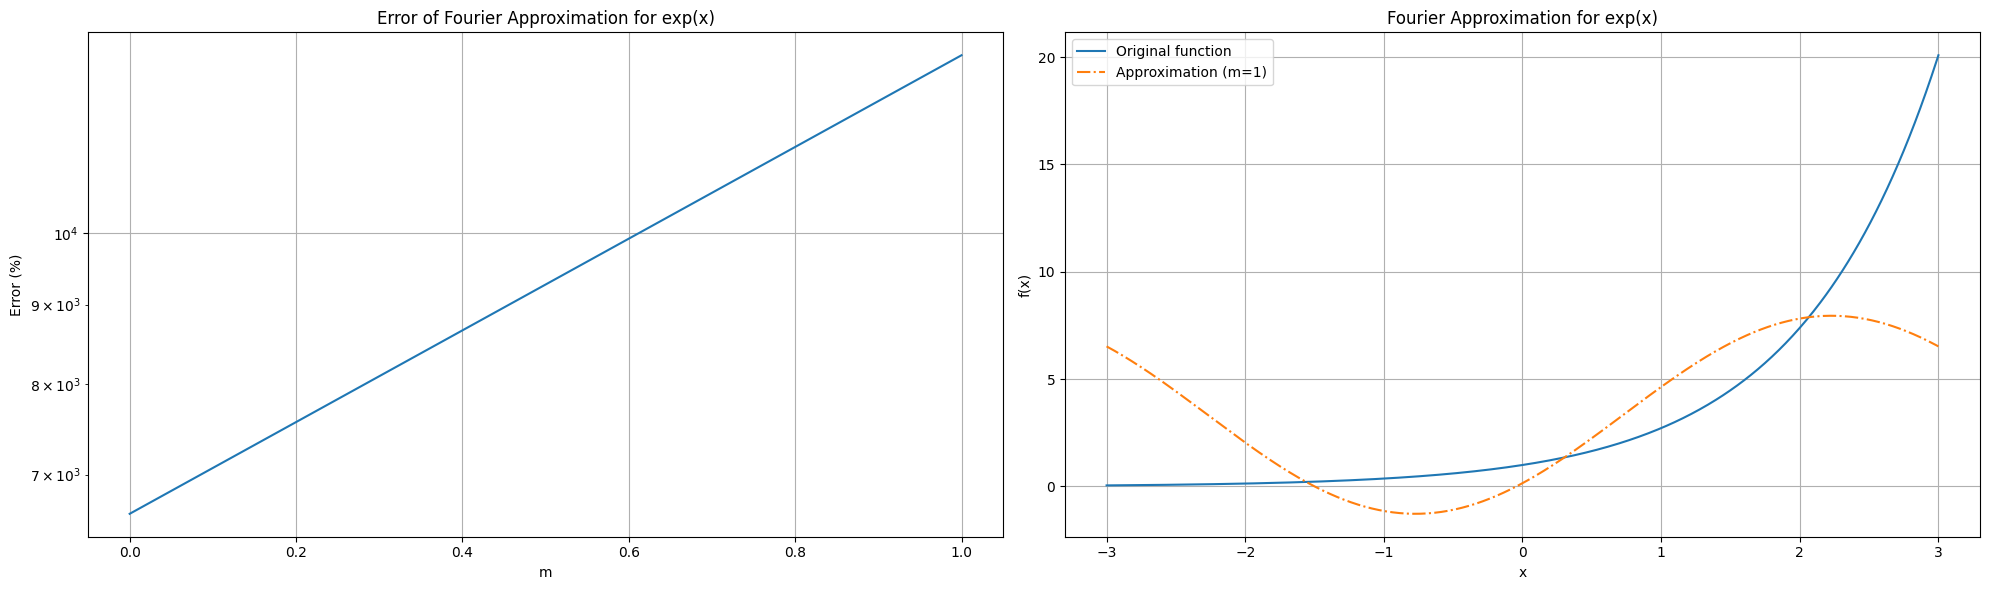



Number of Fourier components for a maximum relative error of 0.1%:

m=1




In [10]:
FA_numpy.find_optimal_fourier_components(FA_numpy.f2, x_values, desired_error=tolerance, label='exp(x)')

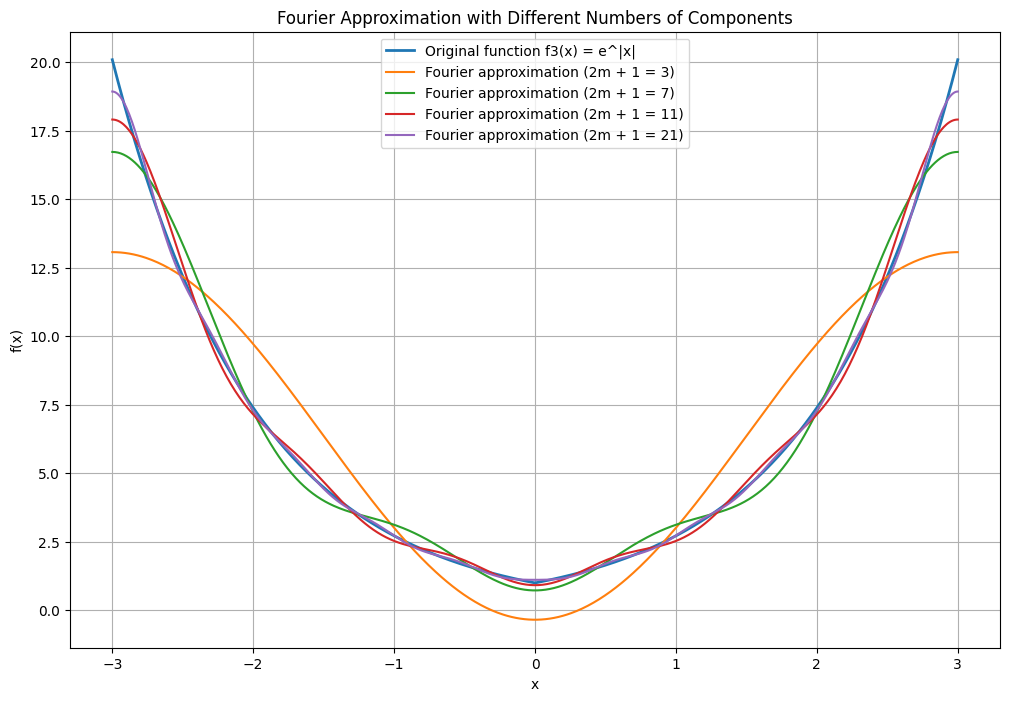

In [11]:
y_values_f3 = FA_numpy.f3(x_values)
FA_numpy.plot_fourier_approximations(x_values, y_values_f3, m_values, function_name='f3(x) = e^|x|')

m=0:	Error = 533.0120%
m=1:	Error = 134.1006%
m=2:	Error = 100.9327%
m=3:	Error = 30.1020%
m=4:	Error = 40.5196%
m=5:	Error = 12.0352%
m=6:	Error = 22.5755%
m=7:	Error = 8.0204%
m=8:	Error = 14.8088%
m=9:	Error = 6.3503%
m=10:	Error = 10.6804%
m=11:	Error = 5.2532%
m=12:	Error = 8.1873%
m=13:	Error = 4.4779%
m=14:	Error = 6.5458%
m=15:	Error = 3.9009%
m=16:	Error = 5.3959%
m=17:	Error = 3.4548%
m=18:	Error = 4.5518%
m=19:	Error = 3.0996%
m=20:	Error = 3.9095%
m=21:	Error = 2.8100%
m=22:	Error = 3.4062%
m=23:	Error = 2.5693%
m=24:	Error = 3.0027%
m=25:	Error = 2.3661%
m=26:	Error = 2.6726%
m=27:	Error = 2.1922%
m=28:	Error = 2.3983%
m=29:	Error = 2.0417%
m=30:	Error = 2.1670%
m=31:	Error = 1.9101%
m=32:	Error = 1.9696%
m=33:	Error = 1.7940%
m=34:	Error = 1.7995%
m=35:	Error = 1.6909%
m=36:	Error = 1.6515%
m=37:	Error = 1.5987%
m=38:	Error = 1.5581%
m=39:	Error = 1.5156%
m=40:	Error = 1.4790%
m=41:	Error = 1.4405%
m=42:	Error = 1.4072%
m=43:	Error = 1.3721%
m=44:	Error = 1.3417%
m=45:	Er

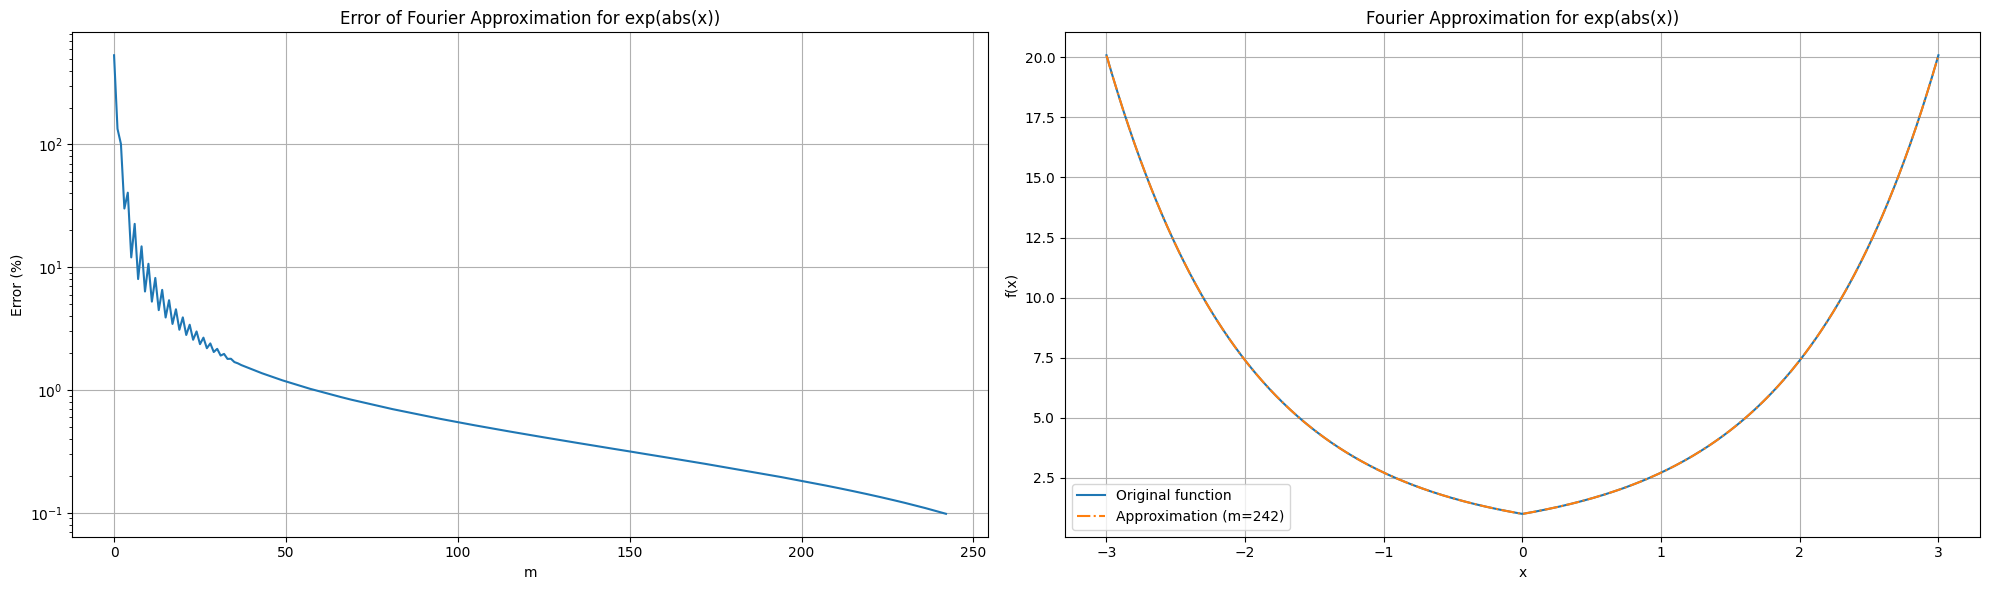



Number of Fourier components for a maximum relative error of 0.1%:

m=242




In [12]:
FA_numpy.find_optimal_fourier_components(FA_numpy.f3, x_values, desired_error=tolerance, label='exp(abs(x))')

## Aufgabe 2: Fourier-Analyse von Sonnenfleckendaten

### (a) Power-Spektrum und Periodizität
Plotten Sie das Power-Spektrum und finden Sie die dominante Periodizität der Schwingung. Damit erhalten Sie eine Abschätzung auf die Dauer des Sonnenzyklus.

In [13]:
from FA import Fourier_Approximation_sunspots as FA_sunspots

In [14]:
# Load the data from the file
file_path = 'Data/sunspots.txt'
years, sunspot_numbers = FA_sunspots.load_sunspot_data(file_path)

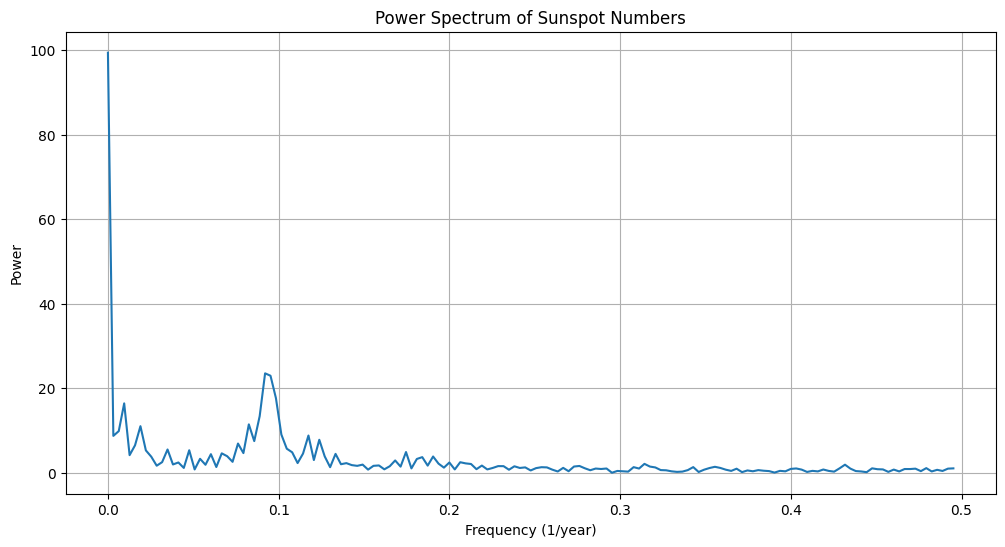

Dominant period: 10.86 years


In [15]:
xf, power_spectrum, dominant_period, yf = FA_sunspots.analyze_sunspot_data(years, sunspot_numbers)
FA_sunspots.show_sunspot_power_spectrum(xf, power_spectrum)
print(f"Dominant period: {dominant_period:.2f} years")

### (b) Weitere Perioden in den Sonnenfleck-Daten
Können Sie weitere Perioden in den Sonnenfleck-Daten mithilfe des Fourier-Spektrums finden?

In [16]:
dominant_periods = FA_sunspots.calculate_dominant_periods(sunspot_numbers, num_periods=5)
print(f"Additional dominant periods: {dominant_periods}")

Dominant period 1: 10.86 years
Dominant period 2: 10.50 years
Dominant period 3: 10.16 years
Dominant period 4: 105.00 years
Dominant period 5: 11.25 years
Additional dominant periods: [ 10.86206897  10.5         10.16129032 105.          11.25      ]


### (c) Komponenten entfernen und Rücktransformation
Entfernen Sie einige Komponenten im Fourier-Spektrum und führen dann eine Rücktransformation durch:
- Größten Komponenten entfernen (k > 20)
- Kleinsten Komponenten entfernen (k < 5)
Beschreiben und erklären Sie die Ergebnisse.

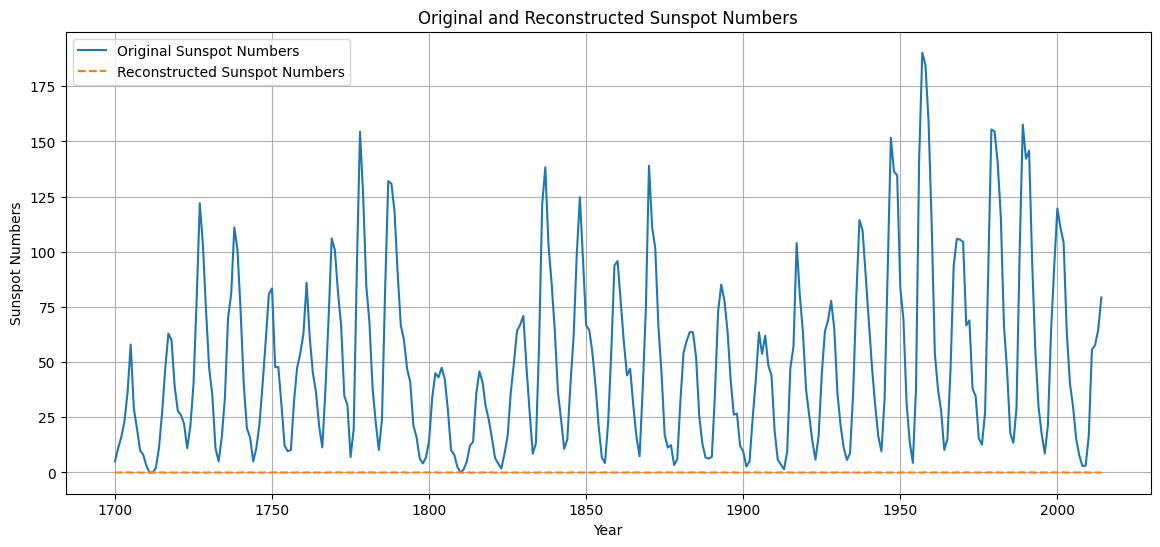

In [17]:
# Remove largest components (k > 20)
reconstructed_signal_largest_removed, yf_mod_largest_removed = FA_sunspots.modify_spectrum_and_reconstruct(yf, k_greater_than=20)
FA_sunspots.show_sunspot_reconstructed_signal(years, sunspot_numbers, reconstructed_signal_largest_removed)

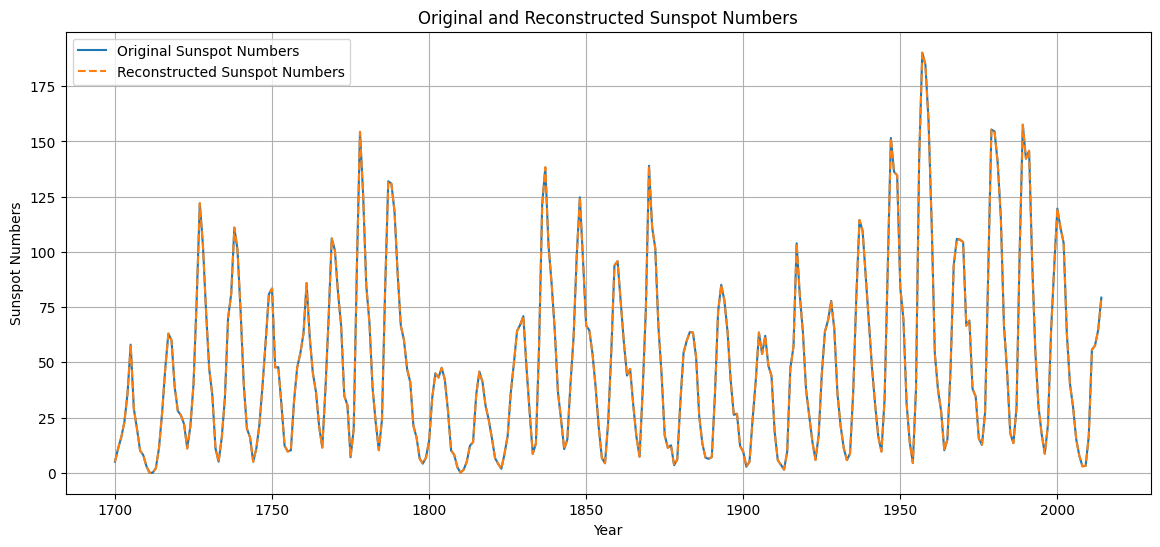

In [18]:
# Remove smallest components (k < 5)
reconstructed_signal_smallest_removed, yf_mod_smallest_removed = FA_sunspots.modify_spectrum_and_reconstruct(yf, k_less_than=5)
FA_sunspots.show_sunspot_reconstructed_signal(years, sunspot_numbers, reconstructed_signal_smallest_removed)

### (d) Vergleich der Ergebnisse
Vergleichen Sie die Ergebnisse mit denen aus Aufgabe 1. Beschreiben und erklären Sie Unterschiede in den Fourier-Koeffizienten.

## Aufgabe 3: Analyse eines Musikstücks

### (a) Wellenform und Amplitudenspektrum
Plotten Sie die Wellenform des Klangs (waveplot) - einmal vollständig und einmal für einen kleinen Zeitbereich, sodass die Wellenform deutlich wird - sowie das Amplitudenspektrum. Wieso ist das Amplitudenspektrum symmetrisch bezüglich des Vorzeichens?

In [19]:
from FA import Fourier_Approximation_music as FA_music

In [20]:
filename = 'Data/music.wav'
y, sr = FA_music.load_audio(filename)

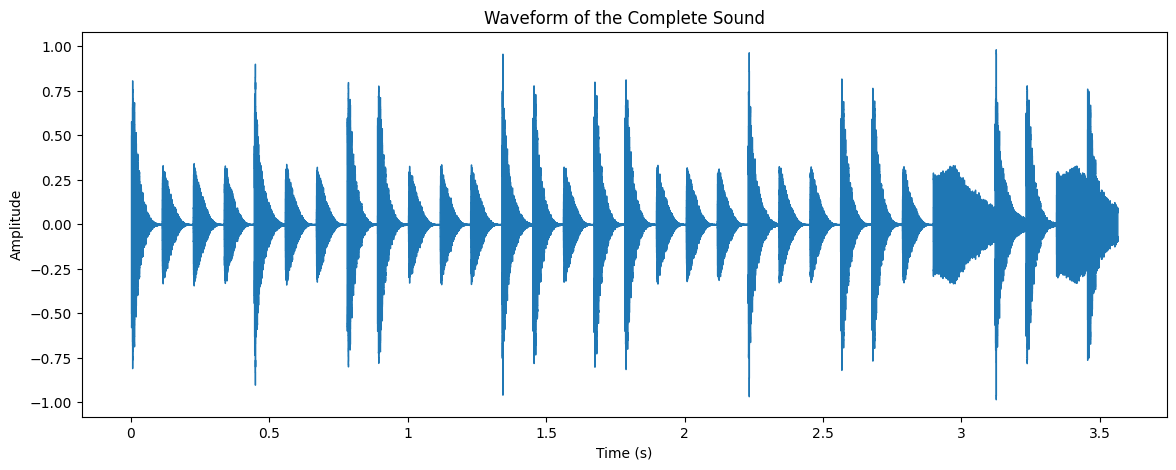

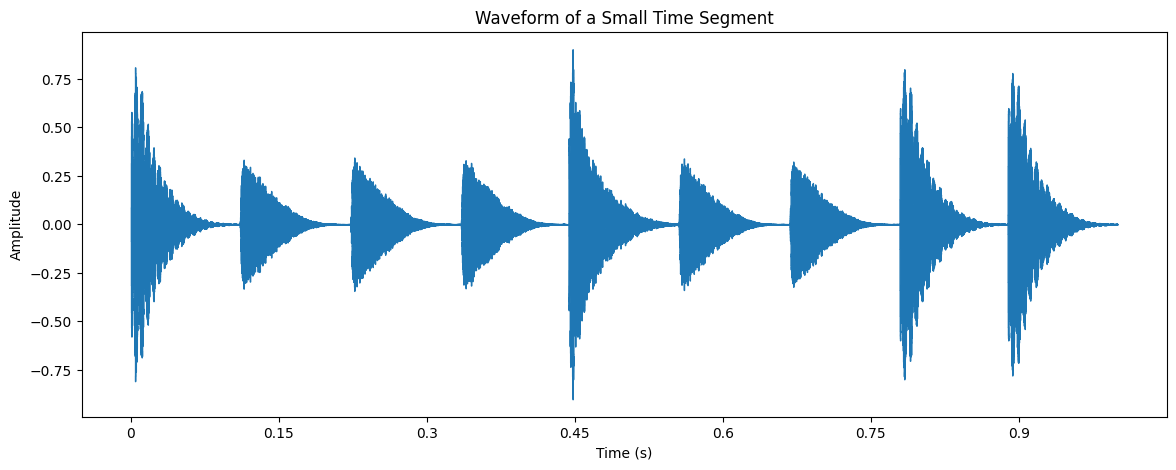

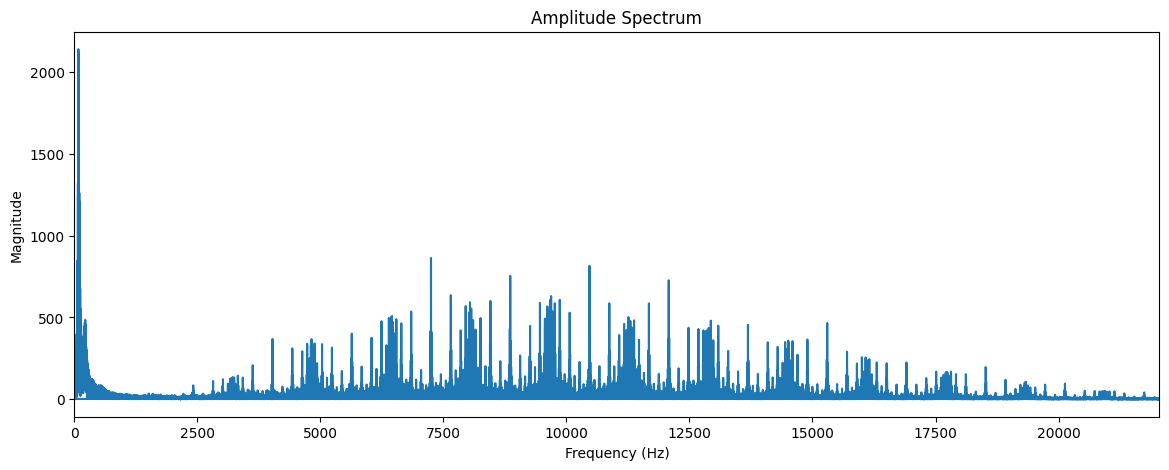

In [21]:
FA_music.plot_waveform(y, sr, 'Waveform of the Complete Sound')
FA_music.plot_waveform(y, sr, 'Waveform of a Small Time Segment', end=sr)

Y, Y_mag, freq = FA_music.compute_amplitude_spectrum(y, sr)
FA_music.plot_amplitude_spectrum(freq, Y_mag, sr)

### (b) Trennung des Sound-Signals
Trennen Sie das Sound-Signal in einen Teil oberhalb und unterhalb von 2 kHz in Frequenzen. Identifizieren Sie jeweils die Top 5 Frequenzen in diesen Frequenzbereichen.

In [22]:
cutoff = 2000  # 2 kHz
Y_high, Y_low = FA_music.split_signal(Y, freq, cutoff)

top5_high = FA_music.identify_top_frequencies(Y_high, freq)
top5_low = FA_music.identify_top_frequencies(Y_low, freq)

print("Top 5 frequencies above 2 kHz:", top5_high)
print("Top 5 frequencies below 2 kHz:", top5_low)

Top 5 frequencies above 2 kHz: [ -8857.42971121 -10467.69292436  10467.69292436   7246.88591552
  -7246.88591552]
Top 5 frequencies below 2 kHz: [ 89.7864137   81.9301025  -81.9301025  -80.80777233  80.80777233]


### (c) Rekonstruktion der gefilterten Signale
Berechnen Sie aus diesen beiden Teilen jeweils eine Rekonstruktion. Berechnen Sie den Fehler der Rekonstruktion wie in Aufgabe 1 für die gefilterten Signale und schreiben Sie die gefilterten rekonstruierten Daten in eine wav-Datei. Beschreiben und erklären Sie das Ergebnis.

In [23]:
y_high = FA_music.reconstruct_signal(Y_high)
y_low = FA_music.reconstruct_signal(Y_low)

mse_high = FA_music.calculate_mse(y, y_high)
mse_low = FA_music.calculate_mse(y, y_low)

print("MSE of the reconstruction for high frequencies:", mse_high)
print("MSE of the reconstruction for low frequencies:", mse_low)

MSE of the reconstruction for high frequencies: 0.008213506136915683
MSE of the reconstruction for low frequencies: 0.006674357406401238


In [24]:
output_directory = 'Data'
FA_music.save_audio(output_directory, 'music_high.wav', y_high, sr)
FA_music.save_audio(output_directory, 'music_low.wav', y_low, sr)

File saved: Data\music_high.wav
File saved: Data\music_low.wav


## Aufgabe 4: Analyse einer Bilddatei

### (a) 2D-Verteilung der Fourier-Komponenten
Plotten Sie die 2D-Verteilung der absoluten Werte der Fourier-Komponenten, sodass die kleinsten k-Werte in der Mitte liegen. Erklären Sie die Natur der Verteilung.

In [25]:
from FA import Fourier_Approximation_image as FA_image

In [26]:
image_path = 'Data/img.jpg'
original_image = FA_image.load_image(image_path)

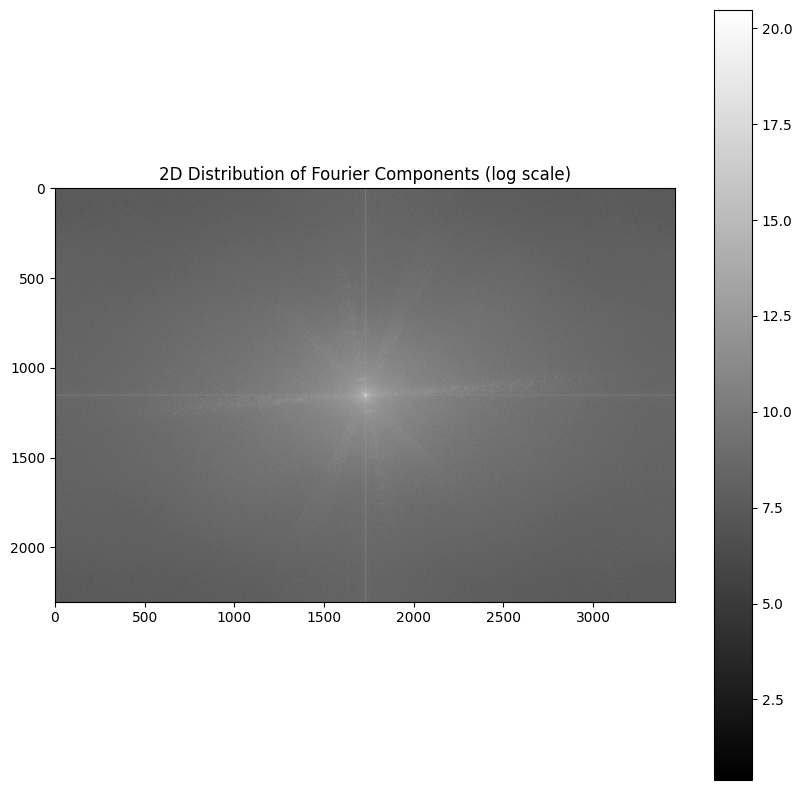

In [27]:
fft_img_shifted, magnitude_spectrum = FA_image.perform_fft(original_image)
FA_image.plot_magnitude_spectrum(magnitude_spectrum, '2D Distribution of Fourier Components (log scale)')

### (b) Entfernen der Fourier-Komponenten
Entfernen Sie je die Fourier-Komponenten mit absoluter Amplitude unter dem Schwellenwert 0.001%, 0.01%, 0.1%, 1% und 10% der maximalen Amplitude. Führen Sie eine inverse Fourier-Transformation durch und stellen Sie die gefilterten Fourierkomponenten sowie die resultierenden Bilder dar. Beschreiben und erklären Sie die Unterschiede.

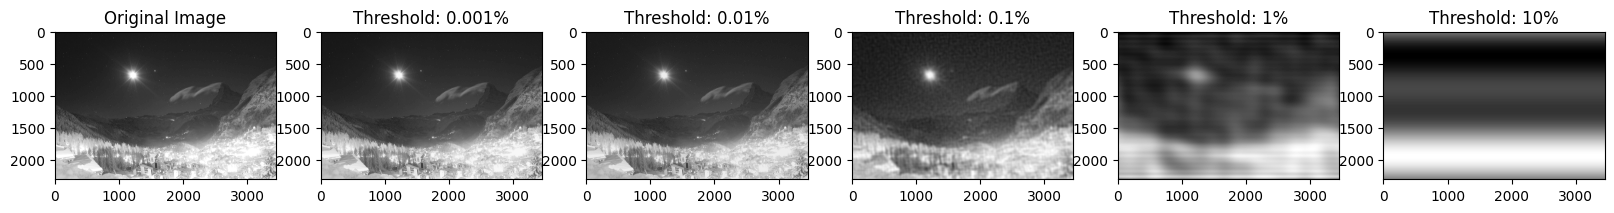

In [28]:
thresholds = [0.001, 0.01, 0.1, 1, 10]
filtered_images = FA_image.filter_fft_components(fft_img_shifted, magnitude_spectrum, thresholds)
FA_image.plot_filtered_images(original_image, filtered_images)

### (c) Fehlerberechnung und Kompression
Berechnen Sie den Fehler (Aufgabe 1) zwischen rekonstruiertem und Originalbild. Wie weit können die Daten komprimiert werden, ohne einen Fehler von höchstens 1% zu überschreiten?

In [29]:
mse_values = FA_image.calculate_mse_values(original_image, filtered_images)
threshold_for_max_1_percent_error = FA_image.determine_compression_threshold(mse_values, original_image)

# Print MSE values and the threshold for 1% error
print("MSE Values for Different Thresholds:")
for threshold, mse in mse_values:
    print(f"Threshold: {threshold}% - MSE: {mse}")

print(f"Threshold that maintains an error of 1% or less: {threshold_for_max_1_percent_error}%")

MSE Values for Different Thresholds:
Threshold: 0.001% - MSE: 1.5029868721655717
Threshold: 0.01% - MSE: 25.07039201515813
Threshold: 0.1% - MSE: 127.54117541751218
Threshold: 1% - MSE: 387.7401365033894
Threshold: 10% - MSE: 1481.189717244729
Threshold that maintains an error of 1% or less: None%
